In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path=r"E:\126156070\automobileEDA.csv"
df=pd.read_csv(path)

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.dtypes


symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
for x in df:
    if df[x].dtypes=="int64":
        df[x]=df[x].astype(float)
        print(df[x].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64


In [6]:
df=df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
x=df.drop('price',axis=1)
y=df['price']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import io
data=pd.read_csv(r"E:\126156070\heart.csv")
non_zero=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [10]:
x=data.iloc[:,0:13]
y=data.iloc[:,13]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [11]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [12]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
print(x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
269   56    1   0       130   283    1        0      103      1      1.6   
191   58    1   0       128   216    0        0      131      1      2.2   
15    50    0   2       120   219    0        1      158      0      1.6   
224   54    1   0       110   239    0        1      126      1      2.8   
250   51    1   0       140   298    0        1      122      1      4.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
142   42    0   2       120   209    0        1      173      0      0.0   
33    54    1   2       125   273    0        0      152      0      0.5   
181   65    0   0       150   225    0        0      114      0      1.0   
262   53    1   0       123   282    0        1       95      1      2.0   
54    63    0   2       135   252    0        0      172      0      0.0   

     slope  ca  thal  
269      0   0     3  
191      1   3     3  
15       1   0    

In [13]:
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [15]:
from sklearn import svm
from sklearn.svm import SVC
svml=svm.SVC(kernel='linear',C=0.01)
svml.fit(x_test,y_test)

SVC(C=0.01, kernel='linear')

In [17]:
SVC(C=0.01,kernel='rbf')
y_train_pred=svml.predict(x_train)
y_test_pred=svml.predict(x_test)
y_test_pred=y_test_pred.astype(int)

In [18]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [22]:
pip install sklearn_rvm

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for sklearn_rvm from https://files.pythonhosted.org/packages/72/31/23767252a2e13b5fef18e6effc5bfde843e3267a24f176c15347f4ed92c7/sklearn_rvm-0.1.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn import svm
from sklearn_rvm import EMRVC
rvml=EMRVC(kernel='linear')
rvml.fit(x_test,y_test)
EMRVC(kernel='rbf')
y_train_pred=rvml.predict(x_train)
y_test_pred=rvml.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel):
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")
    return svm, accuracy

Accuracy with linear kernel: 0.8525


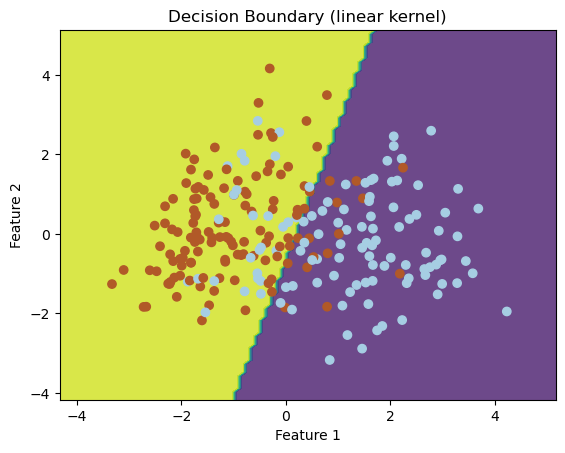

Accuracy with rbf kernel: 0.8525


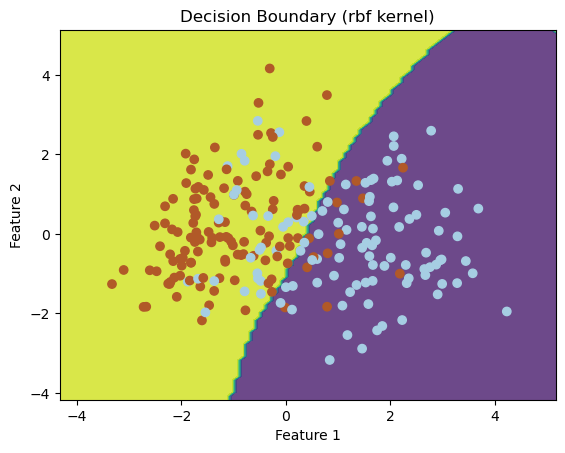

Accuracy with poly kernel: 0.8361


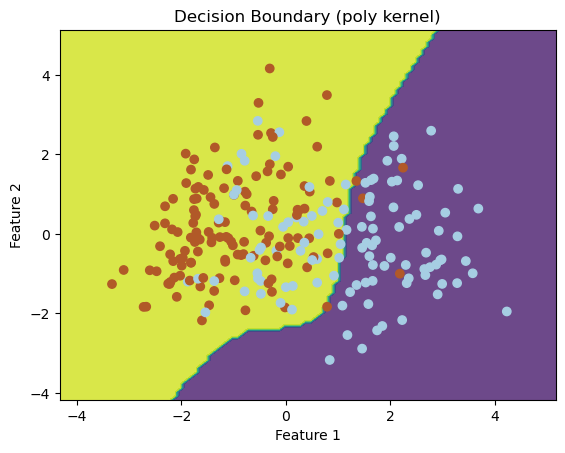

Accuracy with sigmoid kernel: 0.8689


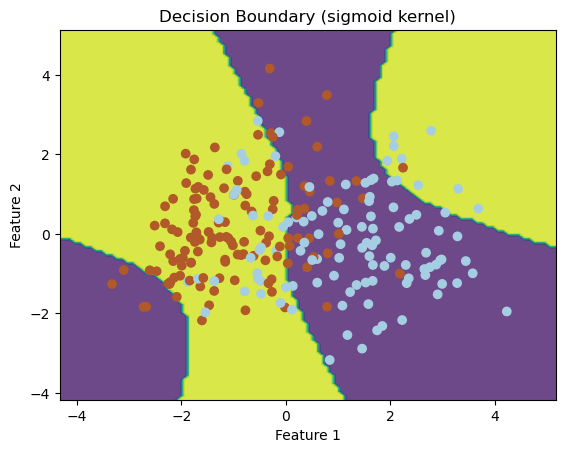

Best kernel: sigmoid with accuracy: 0.8689


In [43]:
from sklearn.decomposition import PCA
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
best_kernel = None
best_accuracy = 0

for kernel in kernels:
    svm, accuracy = train_and_evaluate_svm(x_train, x_test, y_train, y_test, kernel)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel
    if kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(x_train)
        X_test_pca = pca.transform(x_test) 

        svm_pca = SVC(kernel=kernel)
        svm_pca.fit(X_train_pca, y_train)

        x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
        y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title(f"Decision Boundary ({kernel} kernel)")
        plt.show()

print(f"Best kernel: {best_kernel} with accuracy: {best_accuracy:.4f}")

In [45]:
from sklearn.metrics import classification_report
print(f"Classification Report for {kernel} kernel:\n")
print(classification_report(y_test, y_pred))

Classification Report for sigmoid kernel:

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



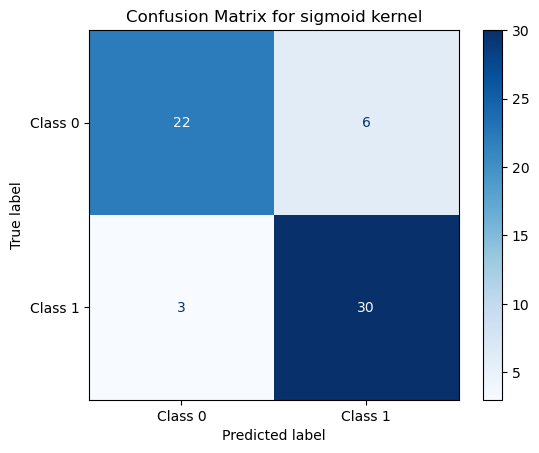

In [46]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for {kernel} kernel")
plt.show()